In [11]:
import numpy as np
import os
from pathlib import Path
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:

def load_processed_split(split_dir):
    """
    Loads processed image and label arrays from split directory.
    Args:
        split_dir (str): Directory containing X.npy and y.npy
    Returns:
        X (np.ndarray): Image array (N, 128, 128)
        y (np.ndarray): Labels array (N,)
    """
    X = np.load(os.path.join(split_dir, 'X.npy'))
    y = np.load(os.path.join(split_dir, 'y.npy'))
    return X, y

In [4]:
def flatten_images(X):
    """
    Flattens each image in array to 1D vector.
    Args:
        X (np.ndarray): (N, H, W) array of images
    Returns:
        X_flat (np.ndarray): (N, H*W) array
    """
    n_samples = X.shape[0]
    return X.reshape(n_samples, -1)

In [ ]:
def apply_pca(X_train_flat, X_val_flat, X_test_flat, n_components=50):
    """
    Fits PCA on X_train_flat and transforms train, val, and test sets to reduced dimensions.
    Args:
        X_train_flat (ndarray): Training data, shape (N_train, n_features)
        X_val_flat (ndarray): Validation data, shape (N_val, n_features)
        X_test_flat (ndarray): Test data, shape (N_test, n_features)
        n_components (int): Number of dimensions to keep
    Returns:
        X_train_pca, X_val_pca, X_test_pca
    """
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train_flat)
    X_val_pca = pca.transform(X_val_flat)
    X_test_pca = pca.transform(X_test_flat)
    return X_train_pca, X_val_pca, X_test_pca, pca

In [15]:
def plot_pca_variance(X_train_flat, max_components=300):
    """
    Plots cumulative explained variance for training data, helps decide component count.
    Args:
        X_train_flat (np.ndarray): Flattened training images
        max_components (int): Try up to this many components
    Returns:
        None
    """
    pca = PCA(n_components=max_components, random_state=42)
    pca.fit(X_train_flat)
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    n_components_95 = np.argmax(cum_var >= 0.95) + 1
    print(f"Number of components for 95% variance: {n_components_95}")
    plt.figure(figsize=(8,4))
    plt.plot(np.arange(1, max_components+1), cum_var)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance Curve')
    plt.grid(True)
    plt.show()

Train shape: (545, 128, 128)
Val shape: (118, 128, 128)
Test shape: (117, 128, 128)
Flattened train shape: (545, 16384)
Number of components for 95% variance: 140


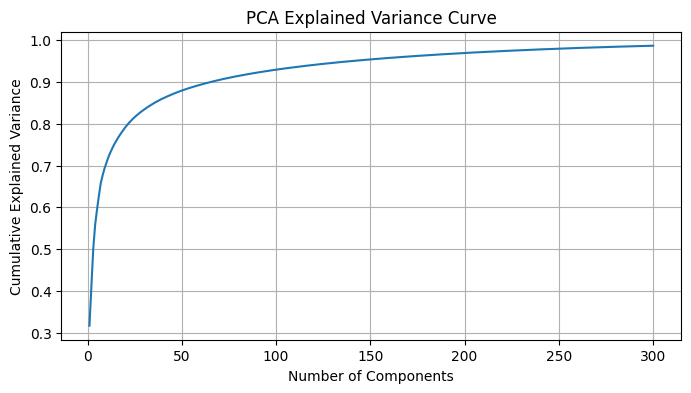

In [ ]:
data_root = '/Users/jessica/Documents/GitHub/breast_cancer_detection/data/processed'
train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'val')
test_dir = os.path.join(data_root, 'test')

# 1. Load data and labels for all splits
X_train, y_train = load_processed_split(train_dir)
X_val, y_val = load_processed_split(val_dir)
X_test, y_test = load_processed_split(test_dir)

print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

# 2. Flatten each image into 1D vector
X_train_flat = flatten_images(X_train)
X_val_flat = flatten_images(X_val)
X_test_flat = flatten_images(X_test)

print("Flattened train shape:", X_train_flat.shape)

# 3. Plot explained variance to help pick cutoff
plot_pca_variance(X_train_flat, max_components=300)


In [17]:
#  4. After plotting, choose your cutoff number (e.g., n_components=100) and run PCA transform as needed:
n_components = 140  # Set this after investigating your variance plot
X_train_pca, X_val_pca, X_test_pca, pca = apply_pca(X_train_flat, X_val_flat, X_test_flat, n_components=n_components)

In [8]:
train_dir = '/Users/jessica/Documents/GitHub/breast_cancer_detection/data/processed/train'

# Use your functions from the previous answer
X_train, y_train = load_processed_split(train_dir)
print(f"Loaded X_train shape: {X_train.shape}")
print(f"Loaded y_train shape: {y_train.shape}")

X_train_flat = flatten_images(X_train)
print(f"Flattened X_train shape: {X_train_flat.shape}")

# Print first label and mean pixel value to check integrity
print(f"First label: {y_train[45]}")
print(f"Sample mean of first image: {X_train_flat[45].mean():.4f}")


Loaded X_train shape: (545, 128, 128)
Loaded y_train shape: (545,)
Flattened X_train shape: (545, 16384)
First label: 1
Sample mean of first image: 0.4660
